# Usiminas: Residência em Ciência de Dados

**Disciplina:** Probabilidade e Análise de Dados com Python

**Professores:** Flávio Figueiredo e Pedro Melo

**Aula 9:** Estudo de caso ENEM

# CADERNO DE EXERCÍCIOS - AULA 09

Utilizando as técnicas aprendidas até agora, analise os microdados do ENEM 2020 para responder às perguntas a seguir. Caso seja possível, gere visualizações apropriadas para cada uma delas.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [8]:
# Carregando o dataframe
# Encoding cp860 é o encoding para português. utf-8 não lê estes dados.
enem = pd.read_csv('MICRODADOS_ENEM_2020_FILTRADOS.csv')

## 1. Quais os 5 estados brasileiros com maior taxa de ausência (geral) no ENEM 2020?


UF: Abstenções
SP: 62986
CE: 48069
MG: 22923
RJ: 20041
AM: 18751


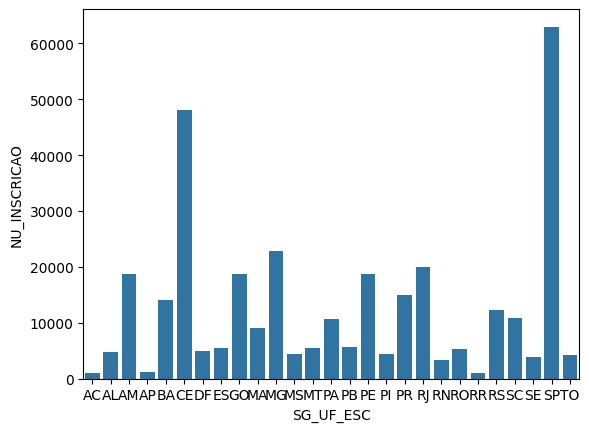

In [47]:
df = enem[enem['SG_UF_ESC'].notna()]
df = df.loc[(df.TP_PRESENCA_CH == 0) & (df.TP_PRESENCA_CN == 0) & (df.TP_PRESENCA_LC == 0) & (df.TP_PRESENCA_MT == 0)]
df = df.groupby('SG_UF_ESC').count().reset_index()
sns.barplot(x='SG_UF_ESC', y='NU_INSCRICAO', data=df, color='tab:blue')
lista = df.sort_values(by='NU_INSCRICAO', ascending=False).iloc[0:5,0:2].values
print('UF: Abstenções')
for i in lista:
    print(f'{i[0]}: {i[1]}')

## 2. Como a probabilidade de um(a) candidato(a) obter nota superior a 600 na redação varia com o tempo desde que ele(a) concluiu o segundo grau? Esta tendência é a mesma observada em Ciências da natureza?

**Ovservação:** O valor da coluna TP_ANO_CONCLUIU já indica o tempo desde a conclusão até prova. Entretanto, o valor 0 não necessariamente indica que o estudante concluiu em 2020! Elimine este valor para análises mais precisas.

## 3. Como fatores como renda (Q006), número de pessoas que moram na mesma residência que o candidato (Q005), e a faixa etária (TP_FAIXA_ETARIA) do participante influenciam em sua nota em Matemática?

**Sugestões:** Para análises mais precisas, elimine as notas 0 e os candidatos que faltaram nas provas analisadas (ex:TP_PRESENCA_MT=0). Como as notas são uma escala contínua, você pode optar, se preferir, por torná-la discreta, criando classes que englobem faixas de notas (ex: 200<NU_NOTA_MT<400).